# Проект: Прогнозирование оттока клиентов для оператора связи «Ниединогоразрыва.ком»

## 1. План работы

### <u>1. План работы</u>
### <u>2. Описание проекта</u>
- #### 2.1 Описание услуг
- #### 2.2 Описание данных

### <u>3. Изучение и предобработка данных</u>
- #### 3.1 Подготовка к изучению данных
- #### 3.2 Изучение и предобработка датафрейма «contract_new.csv»
- #### 3.3 Изучение и предобработка датафрейма «personal_new.csv»
- #### 3.4 Изучение и предобработка датафрейма «internet_new.csv»
- #### 3.5 Изучение и предобработка датафрейма «phone_new.csv»
- #### 3.6 Объединение датафреймов и предобработка единого датафрейма
- #### 3.7 Вопросы по данным

### <u>4. Подготовка данных к обучению модели</u>
- #### 4.1 Разделение датафрейма на выборки
- #### 4.2 Кодирование данных для линейной модели
- #### 4.3 Кодирование данных для модели деревьев
- #### 4.4 Кодирование данных для модели градиентного бустинга

### <u>5. Подбор гиперпараметров моделей и выбор лучшей модели</u>
- #### 5.1 Подбор гиперпараметров и оценка линейной модели
- #### 5.2 Подбор гиперпараметров и оценка дерева решений
- #### 5.3 Подбор гиперпараметров и оценка случайного леса
- #### 5.4 Подбор гиперпараметров и оценка градиентного бустинга CatBoost
- #### 5.5 Финальное тестирование лучшей модели
- #### 5.6 Сравнение лучшей модели с dummy-моделью

### <u>6. Итоговый вывод</u>

## 2. Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### 2.1 Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### 2.2 Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## 3. Изучение и предобработка данных

### 3.1 Подготовка к изучению данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay,\
f1_score, precision_score, recall_score

Загрузим датафреймы 

In [2]:
PTH_1 = '/datasets/contract_new.csv'
PTH_2 = '/datasets/personal_new.csv'
PTH_3 = '/datasets/internet_new.csv'
PTH_4 = '/datasets/phone_new.csv'

try:   
    df_contract = pd.read_csv('C:/Users/Nikita/Desktop/ending_project' + PTH_1)
    df_personal = pd.read_csv('C:/Users/Nikita/Desktop/ending_project' + PTH_2)
    df_internet = pd.read_csv('C:/Users/Nikita/Desktop/ending_project' + PTH_3)
    df_phone = pd.read_csv('C:/Users/Nikita/Desktop/ending_project' + PTH_4)
except:
    df_contract = pd.read_csv('https://code.s3.yandex.net/' + PTH_1)
    df_personal = pd.read_csv('https://code.s3.yandex.net/' + PTH_2)
    df_internet = pd.read_csv('https://code.s3.yandex.net/' + PTH_3)
    df_phone = pd.read_csv('https://code.s3.yandex.net/' + PTH_4)

### 3.2 Изучение и предобработка датафрейма «contract_new.csv»

Выведем первые 10 строк датафрейма «df_contract»

In [3]:
df_contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


Выведем общую информацию о датафрейме «df_contract»

In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


После первичного осмотра данных выявлены следующие проблемы: 
 - Названия колонок не соответствуют "змеиному" стилю
 - В колонке "EndDate" значение "No" следует заменить на актуальную дату выгрузки данных
 - В колонках "EndDate" и "BeginDate" следует изменить тип данных на "datetime"
 - В колонке "TotalCharges" следует изменить тип данных на "float"

Изменим названия колонок в соответствии со "змеиным" стилем

In [5]:
df_contract = df_contract.rename(columns={'customerID': 'customer_id',
                                          'BeginDate': 'begin_date',
                                          'EndDate': 'end_date',
                                          'Type': 'type',
                                          'PaperlessBilling': 'paperless_billing',
                                          'PaymentMethod': 'payment_method',
                                          'MonthlyCharges': 'monthly_charges',
                                          'TotalCharges': 'total_charges'})

В колонке "end_date" значение "No" заменим на актуальную дату выгрузки данных

In [6]:
df_contract['end_date'] = df_contract['end_date'].replace('No','2020-02-01')

В колонке "total_charges" существую строки с пробелами вместо суммы, это клиенты, которые пользуются услугами первый месяц. Заменим пробелы в данных строках значениями из колонки "monthly_charges"

In [7]:
df_contract.loc[df_contract['total_charges'] == ' ', 'total_charges'] = \
df_contract.loc[df_contract['total_charges'] == ' ', 'monthly_charges']

Изменим тип данных в колонках, где это необходимо 

In [8]:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'], format='%Y-%m-%d')
df_contract['end_date'] = pd.to_datetime(df_contract['end_date'], format='%Y-%m-%d')
df_contract['total_charges'] = pd.to_numeric(df_contract['total_charges'])

Проверим датафрейм на явные дубликаты

In [9]:
df_contract.duplicated().sum()

0

Проверим датафрейм на неявные дубликаты в колонках, где это необходимо 

In [10]:
print(f'type: {list(df_contract["type"].unique())}\n\
paperless_billing: {list(df_contract["paperless_billing"].unique())}\n\
payment_method: {list(df_contract["payment_method"].unique())}')

type: ['Month-to-month', 'One year', 'Two year']
paperless_billing: ['Yes', 'No']
payment_method: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']


Проверим датафрейм на пропуски

In [11]:
df_contract.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
dtype: int64

Выведем первые 5 строк датафрейма и его общую информацию после предобработки 

In [12]:
df_contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50


In [13]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


Все выявленные проблемы устранены

Проверим датафрейм на выбросы

In [14]:
df_contract.describe()

,monthly_charges,total_charges
count,7043.000000,7043.000000
mean,64.761692,2115.377573
std,30.090047,2112.678861
min,18.250000,19.050000
25%,35.500000,436.750000
50%,70.350000,1343.350000
75%,89.850000,3236.690000
max,118.750000,9221.380000


Построим "ящик с усами" для колонки "monthly_charges"

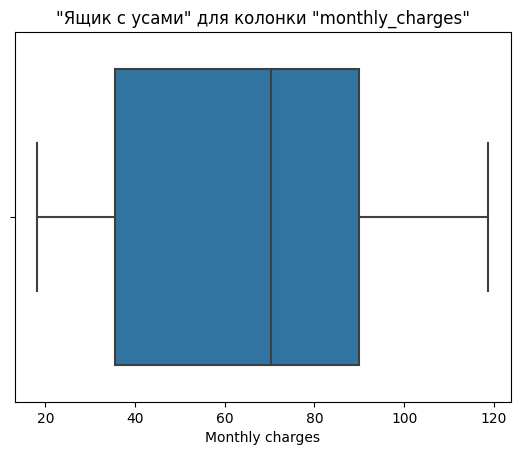

In [15]:
sns.boxplot(x=df_contract['monthly_charges'])
plt.title('"Ящик с усами" для колонки "monthly_charges"')
plt.xlabel('Monthly charges');

Выбросов не обнаружено 

Построим "ящик с усами" для колонки "total_charges"

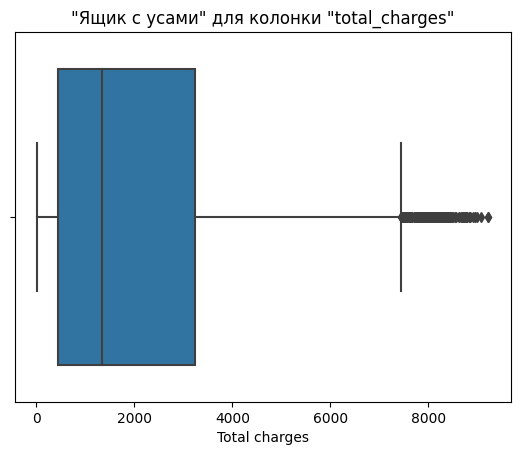

In [16]:
sns.boxplot(x=df_contract['total_charges'])
plt.title('"Ящик с усами" для колонки "total_charges"')
plt.xlabel('Total charges');

Выбросы обнаружены, но поскольку это колонка с общей суммой, которая была потрачена услуги компании за все время, возможно это клиенты, которые пользуются услугами длительное время. Удалять такие выбросы не стоит

Построим гистограммы для колонок, кроме колонок содержащие id клиента и дату, для оценки распределения признаков

Гистограмма для колонки "type"

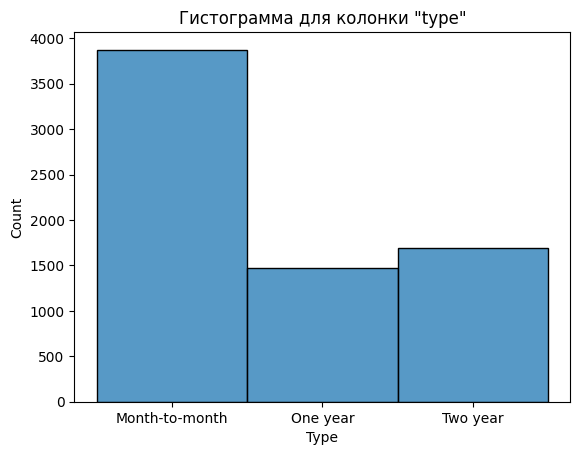

In [17]:
sns.histplot(data=df_contract['type'])
plt.title('Гистограмма для колонки "type"')
plt.xlabel('Type');

Из гистограммы видно, что половина клиентов использую тип оплаты Month-to-month

Гистограмма для колонки "paperless_billing"

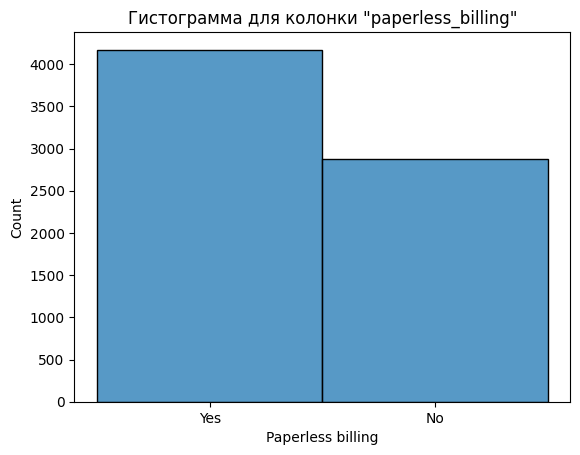

In [18]:
sns.histplot(data=df_contract['paperless_billing'])
plt.title('Гистограмма для колонки "paperless_billing"')
plt.xlabel('Paperless billing');

Из гистограммы видно, что сильного перевеса в классах нет

Гистограмма для колонки "payment_method"

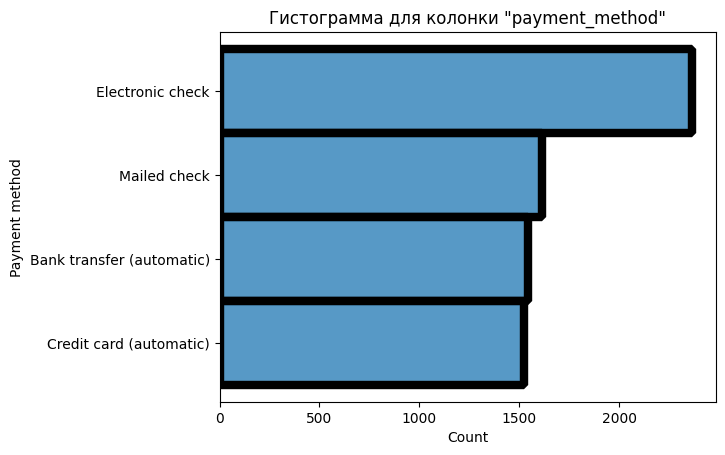

In [19]:
sns.histplot(data=df_contract['payment_method'], y=df_contract['payment_method'])
plt.title('Гистограмма для колонки "payment_method"')
plt.ylabel('Payment method');

Из гистограммы видно, что большинство клиентов оплачивают через электронный чек. У остальных методов оплаты незначительный перевес классов

Гистограмма для колонки "monthly_charges"

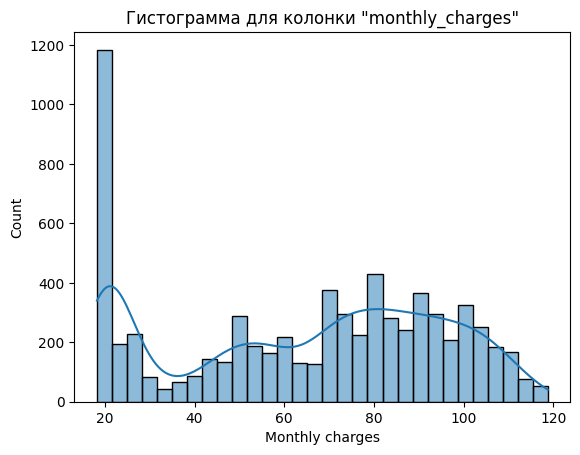

In [20]:
sns.histplot(data=df_contract['monthly_charges'], bins=30, kde=True)
plt.title('Гистограмма для колонки "monthly_charges"')
plt.xlabel('Monthly charges');

Из гистограммы видно, что большинство клиентов платят по минимальному тарифу

Гистограмма для колонки "total_charges"

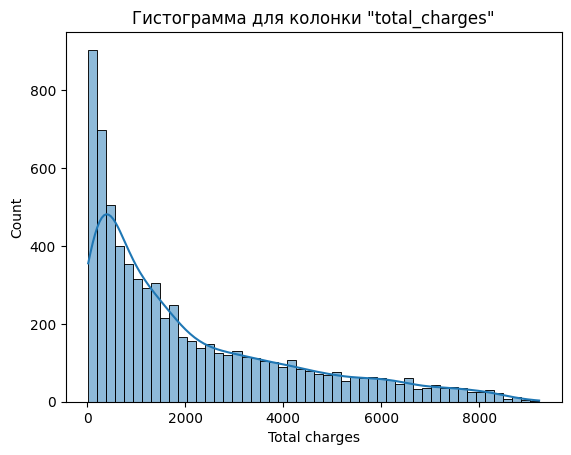

In [21]:
sns.histplot(data=df_contract['total_charges'], bins=50, kde=True)
plt.title('Гистограмма для колонки "total_charges"')
plt.xlabel('Total charges');

Из гистограммы видно, что большинство клиентов в сумме заплатили меньше 200 

Исследуем корреляцию признаков

In [22]:
df_contract.drop(['customer_id'], axis=1).phik_matrix()

interval columns not set, guessing: ['monthly_charges', 'total_charges']


,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
begin_date,1.000000,0.548313,0.766249,0.081447,0.456389,0.421886,0.773659
end_date,0.548313,1.000000,0.285429,0.062936,0.169262,0.173493,0.216439
type,0.766249,0.285429,1.000000,0.106860,0.277462,0.388444,0.468471
paperless_billing,0.081447,0.062936,0.106860,1.000000,0.370495,0.467812,0.203144
payment_method,0.456389,0.169262,0.277462,0.370495,1.000000,0.399526,0.335175
monthly_charges,0.421886,0.173493,0.388444,0.467812,0.399526,1.000000,0.711029
total_charges,0.773659,0.216439,0.468471,0.203144,0.335175,0.711029,1.000000


После исследования обнаружена корреляция между: 
 - begin_date и total_charges - 0.773659
 - begin_date и type - 0.766249
 - total_charges и monthly_charges - 0.711029

**Вывод:**

 В процессе работы с датафреймом «contract_new.csv» произведены следующие изменения:

- заголовки переименованы в соответствии со "змеином" стилем
- изменены типы данных колонок begin_date, end_date, total_charges
- значение "No" в колонке end_date заменено на актуальную дату выгрузки
- Пустые значения в колонке total_charges заменены на значения колонки monthly_charges

Дубликаты, пропуски и явные выбросы не обнаружены. Присутствует перевес в некоторых колонках, которые содержат категориальные признаки. Также на гистограммах для колонок total_charges и monthly_charges виден перевес, который стримится к минимальной сумме. 
 
Обнаружена корреляция между признаками: 

- begin_date и total_charges - 0.773659
- begin_date и type - 0.766249
- total_charges и monthly_charges - 0.711029

### 3.3 Изучение и предобработка датафрейма «personal_new.csv»

Выведем первые 10 строк датафрейма «df_personal»

In [23]:
df_personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


Выведем общую информацию о датафрейме «df_personal»

In [24]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


После первичного осмотра данных выявлены следующие проблемы: 
 - Названия колонок не соответствуют "змеиному" стилю
 - В колонке SeniorCitizen используется обозначение "0" и "1" вместо "No" и "Yes"

Изменим названия колонок в соответствии со "змеиным" стилем

In [25]:
df_personal = df_personal.rename(columns={'customerID': 'customer_id',
                                          'SeniorCitizen': 'senior_citizen',
                                          'Partner': 'partner',
                                          'Dependents': 'dependents'})

Заменим обозначения в колонке «senior_citizen» на обозначения "No" и "Yes"

In [26]:
df_personal['senior_citizen'] = df_personal['senior_citizen'].replace([0, 1],['No', 'Yes'])

Проверим датафрейм на явные дубликаты

In [27]:
df_personal.duplicated().sum()

0

Проверим датафрейм на неявные дубликаты в колонках, где это необходимо 

In [28]:
print(f'gender: {list(df_personal["gender"].unique())}\n\
partner: {list(df_personal["partner"].unique())}\n\
dependents: {list(df_personal["dependents"].unique())}')

gender: ['Female', 'Male']
partner: ['Yes', 'No']
dependents: ['No', 'Yes']


Проверим датафрейм на пропуски

In [29]:
df_personal.isna().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

Выведем первые 5 строк датафрейма и его общую информацию после предобработки 

In [30]:
df_personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,No,Yes,No
1,5575-GNVDE,Male,No,No,No
2,3668-QPYBK,Male,No,No,No
3,7795-CFOCW,Male,No,No,No
4,9237-HQITU,Female,No,No,No


In [31]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   object
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


Все выявленные проблемы устранены

Построим гистограммы для колонок, кроме колонок содержащие id клиента и дату, для оценки распределения признаков

Гистограмма для колонки "gender"

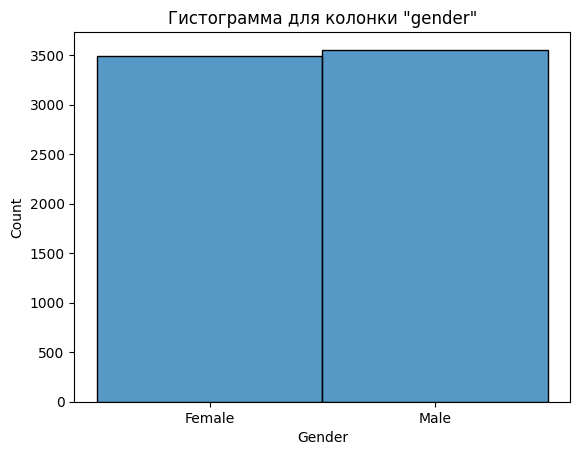

In [32]:
sns.histplot(data=df_personal['gender'])
plt.title('Гистограмма для колонки "gender"')
plt.xlabel('Gender');

Из гистограммы видно, что сильного перевеса в классах нет

Гистограмма для колонки "senior_citizen"

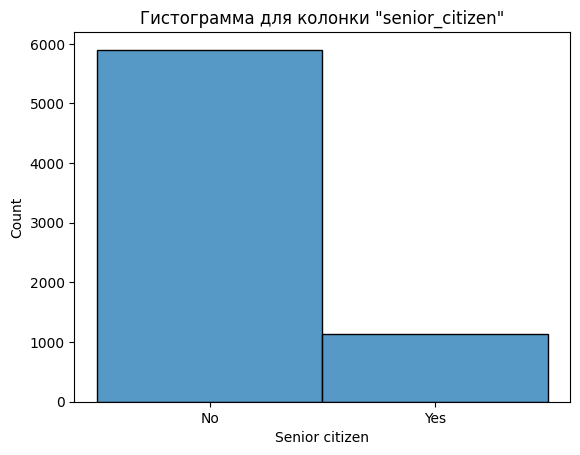

In [33]:
sns.histplot(data=df_personal['senior_citizen'])
plt.title('Гистограмма для колонки "senior_citizen"')
plt.xlabel('Senior citizen');

Из гистограммы видно, что класс "No" имеет сильный перевес перед классом "Yes"

Гистограмма для колонки "partner"

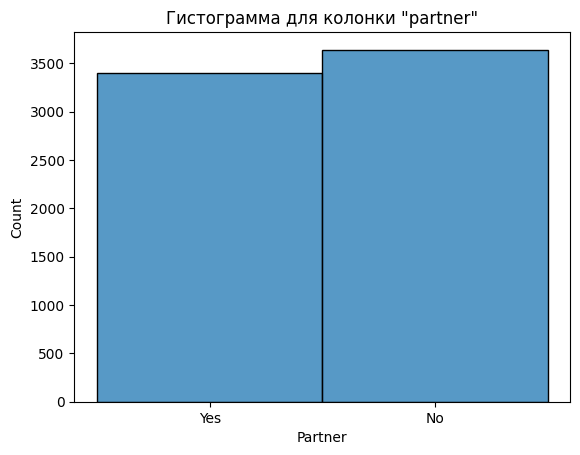

In [34]:
sns.histplot(data=df_personal['partner'])
plt.title('Гистограмма для колонки "partner"')
plt.xlabel('Partner');

Из гистограммы видно, что сильного перевеса в классах нет

Гистограмма для колонки "dependents"

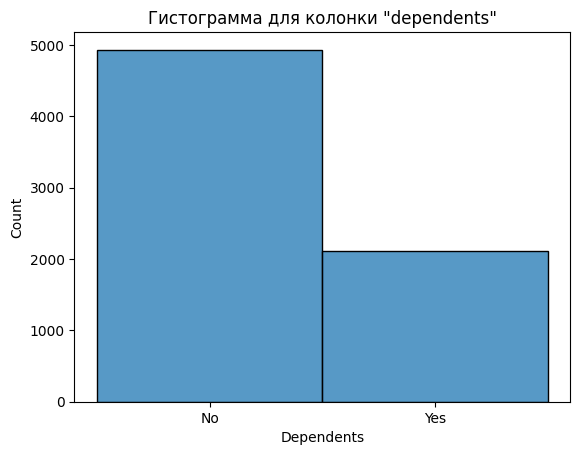

In [35]:
sns.histplot(data=df_personal['dependents'])
plt.title('Гистограмма для колонки "dependents"')
plt.xlabel('Dependents');

Из гистограммы видно, что класс "No" имеет перевес в 2 раза перед классом "Yes"

Исследуем корреляцию признаков

In [36]:
df_personal.drop(['customer_id'], axis=1).phik_matrix()

,gender,senior_citizen,partner,dependents
gender,1.0,0.000000,0.000000,0.000000
senior_citizen,0.0,1.000000,0.016992,0.324576
partner,0.0,0.016992,1.000000,0.652122
dependents,0.0,0.324576,0.652122,1.000000


После исследования обнаружена корреляция между: 
 - dependents и partner - 0.652122


**Вывод:**

 В процессе работы с датафреймом «personal_new.csv» произведены следующие изменения:

- заголовки переименованы в соответствии со "змеином" стилем
- заменены обозначения в колонке «senior_citizen» на обозначения "No" и "Yes"

Дубликаты и пропуски не обнаружены. Присутствует перевес в некоторых колонках, которые содержат категориальные признаки.
 
Обнаружена корреляция между признаками: 

- dependents и partner - 0.652122

### 3.4 Изучение и предобработка датафрейма «internet_new.csv»

Выведем первые 10 строк датафрейма «df_internet»

In [37]:
df_internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


Выведем общую информацию о датафрейме «df_internet»

In [38]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


После первичного осмотра данных выявлены следующие проблемы: 
 - Названия колонок не соответствуют "змеиному" стилю

Изменим названия колонок в соответствии со "змеиным" стилем

In [39]:
df_internet = df_internet.rename(columns={'customerID': 'customer_id',
                                          'InternetService': 'internet_service',
                                          'OnlineSecurity': 'online_security',
                                          'OnlineBackup': 'online_backup',
                                          'DeviceProtection': 'device_protection',
                                          'TechSupport': 'tech_support',
                                          'StreamingTV': 'streaming_tv',
                                          'StreamingMovies': 'streaming_movies'})

Проверим датафрейм на явные дубликаты

In [40]:
df_internet.duplicated().sum()

0

Проверим датафрейм на неявные дубликаты в колонках, где это необходимо 

In [41]:
print(f'internet_service: {list(df_internet["internet_service"].unique())}\n\
online_security: {list(df_internet["online_security"].unique())}\n\
online_backup: {list(df_internet["online_backup"].unique())}\n\
device_protection: {list(df_internet["device_protection"].unique())}\n\
tech_support: {list(df_internet["tech_support"].unique())}\n\
streaming_tv: {list(df_internet["streaming_tv"].unique())}\n\
streaming_movies: {list(df_internet["streaming_movies"].unique())}')

internet_service: ['DSL', 'Fiber optic']
online_security: ['No', 'Yes']
online_backup: ['Yes', 'No']
device_protection: ['No', 'Yes']
tech_support: ['No', 'Yes']
streaming_tv: ['No', 'Yes']
streaming_movies: ['No', 'Yes']


Проверим датафрейм на пропуски

In [42]:
df_internet.isna().sum()

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

Выведем первые 5 строк датафрейма и его общую информацию после предобработки 

In [43]:
df_internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [44]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Все выявленные проблемы устранены

Построим гистограммы для колонок, кроме колонок содержащие id клиента и дату, для оценки распределения признаков

Гистограмма для колонки "internet_service"

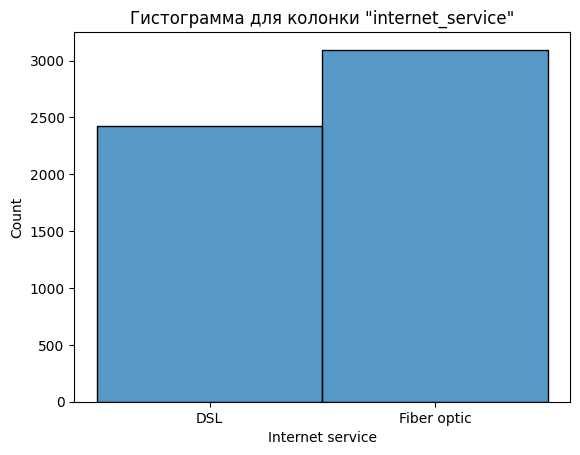

In [45]:
sns.histplot(data=df_internet['internet_service'])
plt.title('Гистограмма для колонки "internet_service"')
plt.xlabel('Internet service');

Из гистограммы видно, что сильного перевеса в классах нет

Гистограмма для колонки "online_security"

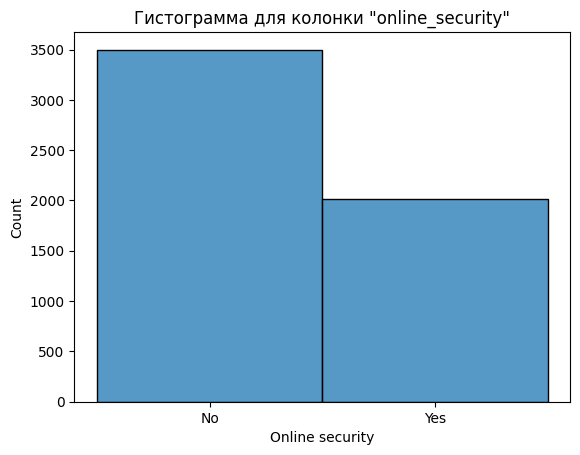

In [46]:
sns.histplot(data=df_internet['online_security'])
plt.title('Гистограмма для колонки "online_security"')
plt.xlabel('Online security');

Из гистограммы видно, что класс "No" имеет перевес почти в 2 раза перед классом "Yes"

Гистограмма для колонки "online_backup"

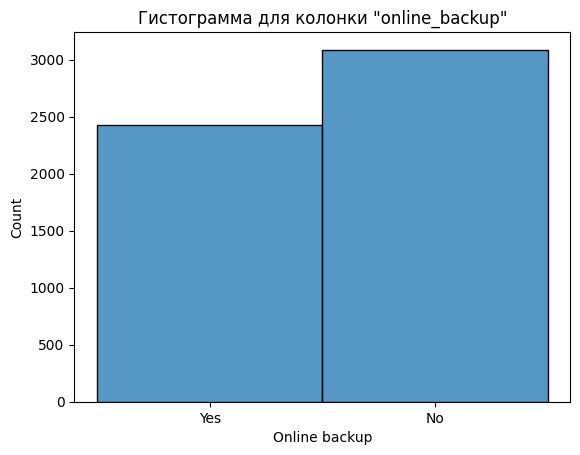

In [47]:
sns.histplot(data=df_internet['online_backup'])
plt.title('Гистограмма для колонки "online_backup"')
plt.xlabel('Online backup');

Из гистограммы видно, что сильного перевеса в классах нет

Гистограмма для колонки "device_protection"

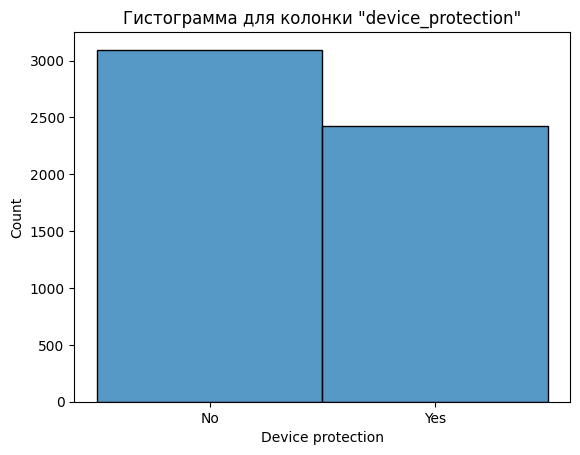

In [48]:
sns.histplot(data=df_internet['device_protection'])
plt.title('Гистограмма для колонки "device_protection"')
plt.xlabel('Device protection');

Из гистограммы видно, что сильного перевеса в классах нет

Гистограмма для колонки "tech_support"

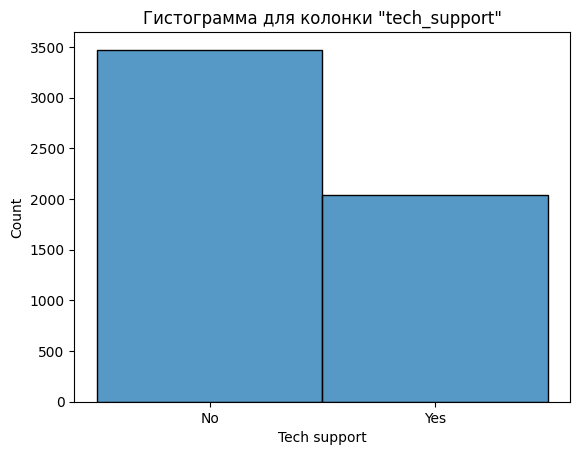

In [49]:
sns.histplot(data=df_internet['tech_support'])
plt.title('Гистограмма для колонки "tech_support"')
plt.xlabel('Tech support');

Из гистограммы видно, что класс "No" имеет перевес почти в 2 раза перед классом "Yes"

Гистограмма для колонки "streaming_tv"

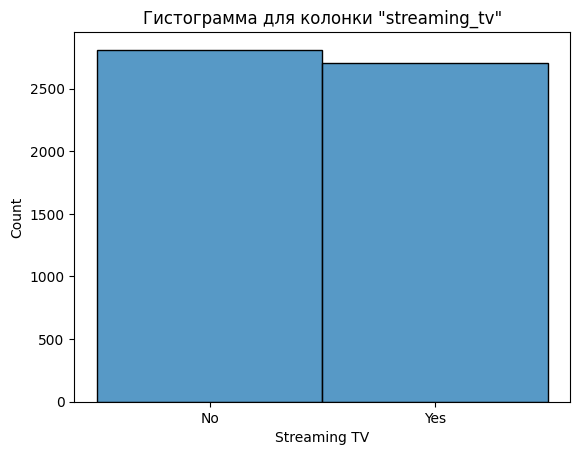

In [50]:
sns.histplot(data=df_internet['streaming_tv'])
plt.title('Гистограмма для колонки "streaming_tv"')
plt.xlabel('Streaming TV');

Из гистограммы видно, что сильного перевеса в классах нет

Гистограмма для колонки "streaming_movies"

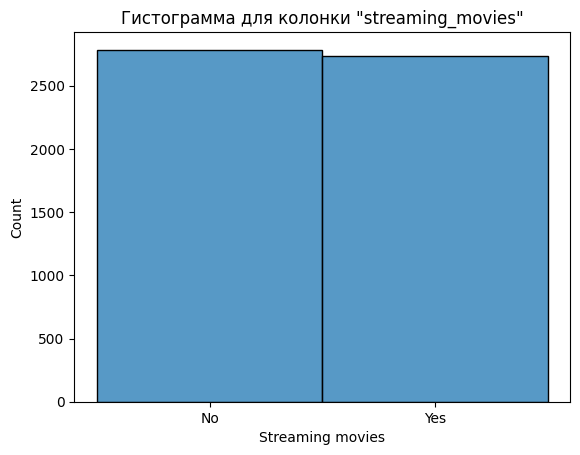

In [51]:
sns.histplot(data=df_internet['streaming_movies'])
plt.title('Гистограмма для колонки "streaming_movies"')
plt.xlabel('Streaming movies');

Из гистограммы видно, что сильного перевеса в классах нет

Исследуем корреляцию признаков

In [52]:
df_internet.drop(['customer_id'], axis=1).phik_matrix()

,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
internet_service,1.000000,0.341950,0.008098,0.000000,0.326553,0.260564,0.246018
online_security,0.341950,1.000000,0.277245,0.263021,0.415484,0.065004,0.084426
online_backup,0.008098,0.277245,1.000000,0.285491,0.293663,0.227275,0.211500
device_protection,0.000000,0.263021,0.285491,1.000000,0.360774,0.420014,0.437634
tech_support,0.326553,0.415484,0.293663,0.360774,1.000000,0.249535,0.250349
streaming_tv,0.260564,0.065004,0.227275,0.420014,0.249535,1.000000,0.630406
streaming_movies,0.246018,0.084426,0.211500,0.437634,0.250349,0.630406,1.000000


После исследования обнаружена корреляция между: 
 - streaming_tv	 и streaming_movies - 0.630406


**Вывод:**

 В процессе работы с датафреймом «internet_new.csv» произведены следующие изменения:

- заголовки переименованы в соответствии со "змеином" стилем

Дубликаты и пропуски не обнаружены. Присутствует перевес в некоторых колонках, которые содержат категориальные признаки.
 
Обнаружена корреляция между признаками: 

- streaming_tv и streaming_movies - 0.630406

### 3.5 Изучение и предобработка датафрейма «phone_new.csv»

Выведем первые 10 строк датафрейма «df_phone»

In [53]:
df_phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


Выведем общую информацию о датафрейме «df_phone»

In [54]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


После первичного осмотра данных выявлены следующие проблемы: 
 - Названия колонок не соответствуют "змеиному" стилю

Изменим названия колонок в соответствии со "змеиным" стилем

In [55]:
df_phone = df_phone.rename(columns={'customerID': 'customer_id',
                                    'MultipleLines': 'multiple_lines'})

Проверим датафрейм на явные дубликаты

In [56]:
df_phone.duplicated().sum()

0

Проверим датафрейм на неявные дубликаты в колонках, где это необходимо 

In [57]:
print(f'multiple_lines: {list(df_phone["multiple_lines"].unique())}')

multiple_lines: ['No', 'Yes']


Проверим датафрейм на пропуски

In [58]:
df_phone.isna().sum()

customer_id       0
multiple_lines    0
dtype: int64

Выведем первые 5 строк датафрейма и его общую информацию после предобработки 

In [59]:
df_phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [60]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Все выявленные проблемы устранены

Построим гистограммы для колонок, кроме колонок содержащие id клиента и дату, для оценки распределения признаков

Гистограмма для колонки "multiple_lines"

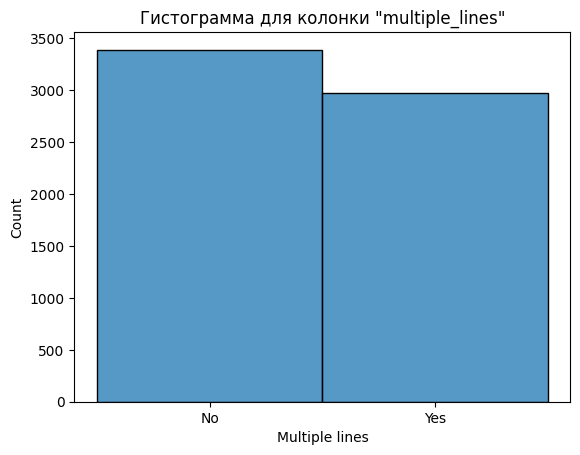

In [61]:
sns.histplot(data=df_phone['multiple_lines'])
plt.title('Гистограмма для колонки "multiple_lines"')
plt.xlabel('Multiple lines');

Из гистограммы видно, что сильного перевеса в классах нет

**Вывод:**

 В процессе работы с датафреймом «phone_new.csv» произведены следующие изменения:

- заголовки переименованы в соответствии со "змеином" стилем

Дубликаты и пропуски не обнаружены. Сильного перевеса в классах нет.

### 3.6 Объединение датафреймов и предобработка единого датафрейма

Объединим датафреймы в один по id клиентов

In [62]:
data = df_contract.merge(df_personal, how='outer', on='customer_id')\
.merge(df_internet, how='outer', on='customer_id')\
.merge(df_phone, how='outer', on='customer_id')

Выведем первые 10 строк и общую информацию получившегося датафрейма   

In [63]:
data.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,No,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,No,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,Female,No,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,Male,No,No,Yes,DSL,Yes,Yes,No,No,No,No,No


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   object        
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  internet_service   5517 non-null   object        
 13  online_security    5517 non-null   object        
 14  online_b

Количество строк единого датафрейма равно количеству строк датафрейма df_contract. Клиенты не были утеряны или добавлены

После объединения появились пропуски в некоторых столбцах, точно конкретизировать данные пропуски нет возможности, поэтому все пропущенные значения заменим на значение “Unknow”

In [65]:
data.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

In [66]:
data = data.fillna('Unknow')

In [67]:
data.isna().sum()

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
dtype: int64

Добавим несколько новых столбцов в датафрейм: 
1.	Информация о длительности договора в днях
2.	Информация о том, активен ли договор 


In [68]:
data['number_of_day'] = (data['end_date'] - data['begin_date']).dt.days.astype('float')

In [69]:
data['leave'] = 1
data.loc[data['end_date'] == '2020-02-01', 'leave'] = 0

Удалим колонки “begin_date” и “ end_date”, так как новые колонки их взаимозаменяют  

In [70]:
data = data.drop(['begin_date', 'end_date'], axis=1)

Выведем первые 5 строк итогового датафрейма

In [71]:
data.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,number_of_day,leave
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,Unknow,31.0,0
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No,1036.0,0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No,123.0,0
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,Unknow,1371.0,0
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No,153.0,0


Поскольку колонка “leave” является таргетным признаком, посмотрим на баланс получившихся классов 

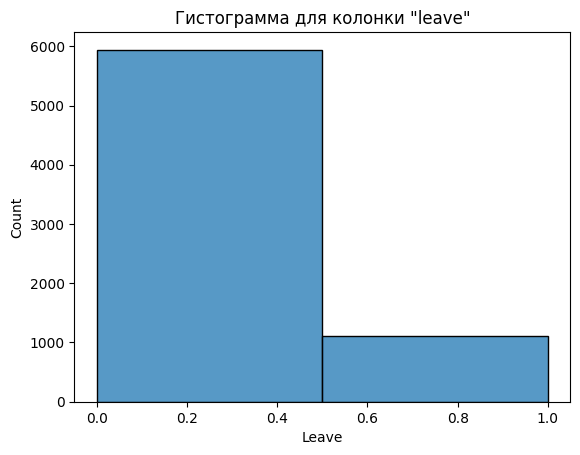

In [72]:
sns.histplot(data=data['leave'], bins=2)
plt.title('Гистограмма для колонки "leave"')
plt.xlabel('Leave');

Класс “0” намного превышает класс “1”, учтем это при обучении модели   

**Вывод:**

В данном пункте все датафреймы объединены в единый датафрейм. Количество строк единого датафрейма равно количеству строк датафрейма df_contract. Клиенты не были утеряны или добавлены. Появившиеся пропуски заменены на значения "Unknow". Давлены 2 колонки с информацией о длительности договора в днях - колонка "number_of_day" и информацией о том, активен ли договор - колонка "leave". Колонка "leave" является таргетным признаком. Удалены колонки “begin_date” и “end_date”, так как новые колонки их взаимозаменяют. Построена гистограмма для колонки "leave", для отображения баланса классов. На гистограмме наблюдается сильный дисбаланс классов, это необходимо учесть при обучении модели.  

### 3.7 Вопросы по данным

1.	Корректно ли считать, что если в изначальном датафрейме в колонке “end_date” стоит дата “2020-02-01” (дата выгрузки), то договор на оказание услуг не закрыт?

## 4. Подготовка данных к обучению модели

### 4.1 Разделение датафрейма на выборки

Разделим датасет на 2 выборки: Выборка с фичами и выборка с таргетным признаком

In [73]:
features = data.drop(['leave', 'customer_id'], axis=1)
target = data['leave']

Разделим получившиеся выборки на выборки для обучения и теста. Размер выборки для теста - 25% от начального размера

In [74]:
RANDOM_STATE = 60623

train_features, test_features, train_target, test_target = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=RANDOM_STATE)
print(f'Размер обучающей выборки для фичей: {train_features.shape}\n\
Размер обучающей выборки для таргета: {train_target.shape[0]}\n\
Размер тестовой выборки для фичей: {test_features.shape}\n\
Размер тестовой выборки для таргета: {test_target.shape[0]}')

Размер обучающей выборки для фичей: (5282, 18)
Размер обучающей выборки для таргета: 5282
Размер тестовой выборки для фичей: (1761, 18)
Размер тестовой выборки для таргета: 1761


После разделения проверили размерности. Размерности совпадают с ожидаемыми 

### 4.2 Кодирование данных для линейной модели

Для корректной работы линейных моделей, категориальные признаки  необходимо закодировать методом One-Hot Encoding и провести масштабирование численных признаков 

Закодируем категориальные признаки методом One-Hot Encoding

In [75]:
train_features_reg = train_features.copy()
test_features_reg = test_features.copy()
train_target_reg = train_target.copy()
test_target_reg = test_target.copy()

ohe_features_ridge = train_features_reg.select_dtypes(include='object').columns.to_list()

encoder_ohe = OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
encoder_ohe.fit(train_features_reg[ohe_features_ridge])
train_features_reg[
    encoder_ohe.get_feature_names()
] = encoder_ohe.transform(train_features_reg[ohe_features_ridge])
test_features_reg[
    encoder_ohe.get_feature_names()
] = encoder_ohe.transform(test_features_reg[ohe_features_ridge])

train_features_reg = train_features_reg.drop(ohe_features_ridge, axis=1)
test_features_reg = test_features_reg.drop(ohe_features_ridge, axis=1)

Промасштабируем численные признаки 

In [76]:
standart_columns = ['monthly_charges', 'total_charges', 'number_of_day']

train_features_reg_scaler = train_features_reg.copy()
test_features_reg_scaler = test_features_reg.copy()

scaler = StandardScaler()
scaler.fit(train_features_reg_scaler[standart_columns])
train_features_reg_scaler[standart_columns] = scaler.transform(train_features_reg_scaler[standart_columns])
test_features_reg_scaler[standart_columns] = scaler.transform(test_features_reg_scaler[standart_columns])

### 4.3 Кодирование данных для модели деревьев

Для корректной работы модели деревьев необходимо закодировать категориальные признаки. Масштабирование применять не обязательно. Кодировать признаки можно методом как One-Hot Encoding, так и OrdinalEncoding. Поскольку в предыдущем пункте кодирование методом One-Hot Encoding не добавило огромное количество столбцов, то в данном случае можно скопировать выборку с закодированными данными без масштабирования из предыдущего пункта 

In [77]:
train_features_tree = train_features_reg.copy()
test_features_tree = test_features_reg.copy()
train_target_tree = train_target.copy()
test_target_tree = test_target.copy()

### 4.4 Кодирование данных для модели градиентного бустинга

Модель градиентного бустинга CatBoost может кодировать признаки внутри себя, поэтому дополнительная обработка данных с нашей стороны не требуется  

## 5. Подбор гиперпараметров моделей и выбор лучшей модели

При выборе лучшей модели необходимо достигнуть показателя метрики ROC_AUC не меньше 0.85 

### 5.1 Подбор гиперпараметров и оценка линейной модели

Обучим модель логистической регрессии  

In [78]:
grid_param_reg = {'random_state': [RANDOM_STATE],
                  'class_weight': ['balanced'],
                  'C': range(1, 6),
                  'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
                  'max_iter': range(500, 1100, 100)}

model_reg = LogisticRegression()

grid_reg = GridSearchCV(model_reg, param_grid=grid_param_reg, cv=3, scoring='roc_auc')
grid_reg.fit(train_features_reg_scaler, train_target_reg)
print(f'ROC_AUC модели: {grid_reg.best_score_}\nГиперпараметры модели: {grid_reg.best_params_}')

ROC_AUC модели: 0.7563082877608136
Гиперпараметры модели: {'C': 1, 'class_weight': 'balanced', 'max_iter': 500, 'random_state': 60623, 'solver': 'sag'}


**Вывод:** После подбора гиперпараметров модель логистической регрессии достигла показателя метрики ROC_AUC  - 0.756, что меньше требуемого порога.   

### 5.2 Подбор гиперпараметров и оценка дерева решений

Обучим модель дерева решений

In [79]:
grid_param_tree = {'random_state': [RANDOM_STATE],
                  'class_weight': ['balanced'],
                  'max_depth': range(1, 11),
                  'min_samples_split': range(2, 12, 2),
                  'min_samples_leaf': range(1, 5)}

model_tree = DecisionTreeClassifier()

grid_tree = GridSearchCV(model_tree, param_grid=grid_param_tree, cv=3, scoring='roc_auc')
grid_tree.fit(train_features_tree, train_target_tree)
print(f'ROC_AUC модели: {grid_tree.best_score_}\nГиперпараметры модели: {grid_tree.best_params_}')

ROC_AUC модели: 0.7810136054327738
Гиперпараметры модели: {'class_weight': 'balanced', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 60623}


**Вывод:** После подбора гиперпараметров модель дерева решений достигла показателя метрики ROC_AUC  - 0.781. Показатель лучше чем у логистической регрессии, но все ровно меньше требуемого порога.

### 5.3 Подбор гиперпараметров и оценка случайного леса

Обучим модель случайного леса

In [80]:
grid_param_forest = {'random_state': [RANDOM_STATE],
                  'class_weight': ['balanced'],
                  'max_depth': range(1, 11),
                  'n_estimators': range(2, 102, 10),
                  'min_samples_split': range(2, 12, 2),
                  'min_samples_leaf': range(1, 5)}

model_forest = RandomForestClassifier()

grid_forest = GridSearchCV(model_forest, param_grid=grid_param_forest, cv=3, scoring='roc_auc')
grid_forest.fit(train_features_tree, train_target_tree)
print(f'ROC_AUC модели: {grid_forest.best_score_}\nГиперпараметры модели: {grid_forest.best_params_}')

ROC_AUC модели: 0.8196456913251252
Гиперпараметры модели: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 52, 'random_state': 60623}


**Вывод:** После подбора гиперпараметров модель случайного леса достигла показателя метрики ROC_AUC  - 0.820. Показатель лучше чем у логистической регрессии и дерева решений, но все ровно меньше требуемого порога.

### 5.4 Подбор гиперпараметров и оценка градиентного бустинга CatBoost

Обучим модель градиентного бустинга

In [81]:
grid_param_cat = {'random_state': [RANDOM_STATE],
                  'auto_class_weights': ['Balanced'],
                  'iterations': range(1000, 3001, 200),
                  'learning_rate': [0.01, 0.03, 0.1]}

categorical_features_indices = np.where(train_features.dtypes != np.float64)[0]

model_cat = CatBoostClassifier()

grid_cat = GridSearchCV(model_cat, param_grid=grid_param_cat, cv=3, scoring='roc_auc')
grid_cat.fit(train_features, train_target, verbose=False, cat_features=categorical_features_indices)
print(f'ROC_AUC модели: {grid_cat.best_score_}\nГиперпараметры модели: {grid_cat.best_params_}')

ROC_AUC модели: 0.8821918048765603
Гиперпараметры модели: {'auto_class_weights': 'Balanced', 'iterations': 3000, 'learning_rate': 0.03, 'random_state': 60623}


**Вывод:** После подбора гиперпараметров модель градиентного бустинга достигла показателя метрики ROC_AUC  - 0.882 и привысила требуемый порог. Это наилучший показать среди всех моделей, поэтому получившиеся модель взята для финального тестирования.

### 5.5 Финальное тестирование лучшей модели

Проведем финальное тестирование для модели градиентного бустинга

In [82]:
final_model = grid_cat.best_estimator_
final_model.fit(train_features, train_target, verbose=False, cat_features=categorical_features_indices)
final_probs = final_model.predict_proba(test_features)[:, 1]
final_auc = roc_auc_score(test_target, final_probs)
final_auc

0.9160532599667774

На финальном тестировании модель достигла показателя метрики ROC_AUC – 0.916, что выше заданного порога в 0.85

Построим матрицу ошибок 

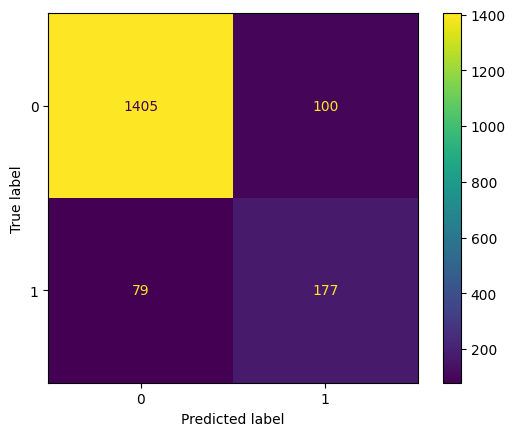

Истинно отрицательные ответы(TN) - 1405
Ложноположительные ответы(FP) - 100
Ложноотрицательные ответы(FN) - 79
Истинно положительные ответы(TP) - 177
Полнота(Recall) - 0.69140625
Точность(Precision) - 0.6389891696750902
F1-Мера - 0.6641651031894934


In [83]:
fpr, tpr, thresholds = roc_curve(test_target, final_probs)
final_predict = final_model.predict(test_features)
cm = confusion_matrix(test_target, final_predict, labels=final_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=final_model.classes_)
disp.plot()
plt.show()
print(f'Истинно отрицательные ответы(TN) - {cm[0, 0]}\n\
Ложноположительные ответы(FP) - {cm[0, 1]}\n\
Ложноотрицательные ответы(FN) - {cm[1, 0]}\n\
Истинно положительные ответы(TP) - {cm[1, 1]}\n\
Полнота(Recall) - {recall_score(test_target, final_predict)}\n\
Точность(Precision) - {precision_score(test_target, final_predict)}\n\
F1-Мера - {f1_score(test_target, final_predict)}')

Построим график важности признаков для модели

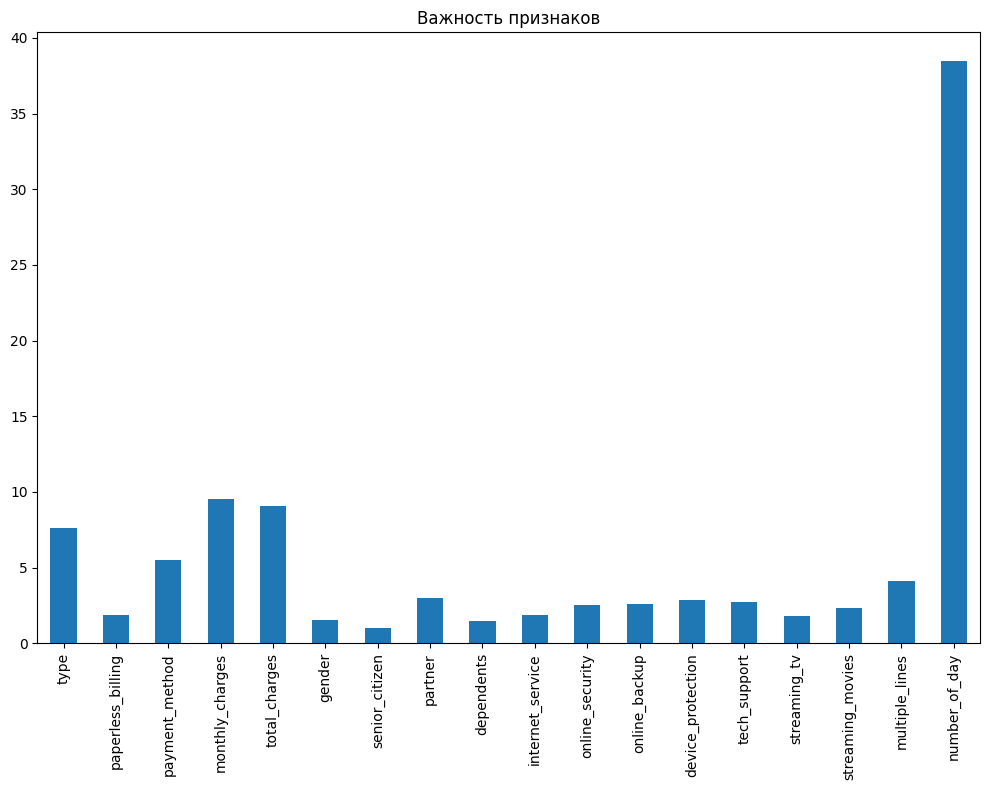

In [84]:
cat_imp = pd.Series(final_model.get_feature_importance(),
                         train_features.columns)
fig, ax = plt.subplots(figsize=(10,8))
cat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
fig.tight_layout()

**Вывод:** Модель градиентного бустинга показала достигла показателя метрики ROC_AUC – 0.916,что выше заданного порога в 0.85. Для финальной модели была пострена матрица ошибок и проанализорванны метрики связанные с матрицей. Показатели следующие: 
- Полнота(Recall) - 0.69140625 - доля положительных среди всех ответов
- Точность(Precision) - 0.6389891696750902 - количество отрицательных ответов которые нашла модель, пока искала положительные
- F1-Мера - 0.6641651031894934 - среднее гармоническое полноты и точности

Также построен график важности признаков для модели. Наиболее важным признаком для модели является информация о том о длительности договора в днях

### 5.6 Сравнение лучшей модели с dummy-моделью

Сравнение модели с dummy-моделью, или тест на адекватность предсказаний, можно произвести графическим способом – сравнить площади на ROC-кривой случайной модели и финальной модели. ROC-кривая случайной модели прямая линия с координатами (0,0) (1.1).

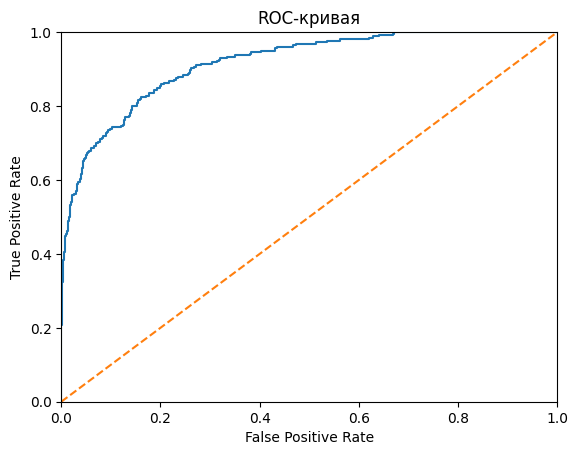

In [85]:
fpr, tpr, thresholds = roc_curve(test_target, final_probs)
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Графически видно, что площадь под ROC-кривой финальной модели отличается от площади ROC-кривой случайной модели в большую сторону, использование модели градиентного бустинга можно считать оправданным . 

## 6. Итоговый вывод

В разделе «Изучение и предобработка данных» были загруженны датасеты для реализации прогнозированния оттока клиентов. При первичном осмотре обнаруженны некоторые проблемы: 

Для датафрейма «contract_new.csv»
 - Названия колонок не соответствуют "змеиному" стилю
 - В колонке "EndDate" значение "No" следует заменить на актуальную дату выгрузки данных
 - В колонках "EndDate" и "BeginDate" следует изменить тип данных на "datetime"
 - В колонке "TotalCharges" следует изменить тип данных на "float"
 
Для датафрейма «personal_new.csv»
 - Названия колонок не соответствуют "змеиному" стилю
 - В колонке SeniorCitizen используется обозначение "0" и "1" вместо "No" и "Yes"
 
Для датафрейма «internet_new.csv»
 - Названия колонок не соответствуют "змеиному" стилю
 
Для датафрейма «phone_new.csv»
 - Названия колонок не соответствуют "змеиному" стилю
 
В ходе работы данные проблемы устранены. Дубликаты, пропуски и явные выбросы не обнаруженны. Также прослеживается высокая корреляция между признаками: 
- begin_date и total_charges - 0.773659
- begin_date и type - 0.766249
- total_charges и monthly_charges - 0.711029
- dependents и partner - 0.652122
- streaming_tv и streaming_movies - 0.630406

Все четыре датафрейма объеденены в один общий датафрейм. Появившиеся пропуски заменены на значения "Unknow". Давлены 2 колонки с информацией о длительности договора в днях - колонка "number_of_day" и информацией о том, активен ли договор - колонка "leave". Колонка "leave" является таргетным признаком. Удалены колонки “begin_date” и “end_date”, так как новые колонки их взаимозаменяют. Построена гистограмма для колонки "leave", для отображения баланса классов. На гистограмме наблюдается сильный дисбаланс классов.

В разделе «Подготовка данных к обучению модели» общий датафрейм разделен на выборку с фичами и выборку с таргетным признаком. Получившиеся выборки дополнительно разделены на обучающую и тестовую выборку. Размер тестовой выборки составляет 25% от размера общего датафрейма. Для обучения были использованы 4 модели: Логистическая регрессия, Дерево решений, Случайный лес и градиентный бустинг CatBoost. Для моделей логистической регрессии, дерева решений и случайного леса были закодированы категориальные признаки методом One-Hot Encoding. Для логистической регрессии также дополнительно проведено масштабирование численных признаков. 
Для обучения использованы следующие признаки:
- type    
- paperless_billing  
- payment_method       
- monthly_charges     
- total_charges       
- gender     
- senior_citizen         
- partner      
- dependents       
- internet_service       
- online_security        
- online_backup     
- device_protection     
- tech_support  
- streaming_tv    
- streaming_movies      
- multiple_lines
- number_of_day
- leave

В результате обучения выявлена лучшая модель - градиентный бустинг CatBoost с гиперпараметрами: 
- 'auto_class_weights': 'Balanced'
- 'iterations': 3000
- 'learning_rate': 0.03
- 'random_state': 60623

Показатель ROC_AUC на обучающей выборке - 0.8821918048765603, что является показателем, который перешел необходимый порог в 0.85.

На тестовой выборке модель градиентного бустинга показала достигла показателя метрики ROC_AUC – 0.916. Для финальной модели была построена матрица ошибок и проанализированы метрики, связанные с матрицей. Показатели, следующие:  
- Полнота(Recall) - 0.69140625 - доля положительных среди всех ответов
- Точность(Precision) - 0.6389891696750902 - количество отрицательных ответов которые нашла модель, пока искала положительные
- F1-Мера - 0.6641651031894934 - среднее гармоническое полноты и точности

Также построен график важности признаков для модели. Наиболее важным признаком для модели является информация о том о длительности договора в днях, тип договора, ежемесячные траты на услуги и общее количество трат на услуги.